In [1]:
%reload_ext autoreload
%autoreload 2
%run startup.py
from tqdm.auto import tqdm
from itertools import chain
from functools import reduce

from trajectory.planner import Segment, SegmentList, Joint

[3 3] [0.0, 0.0]
CPU times: user 21 s, sys: 425 ms, total: 21.4 s
Wall time: 21.4 s


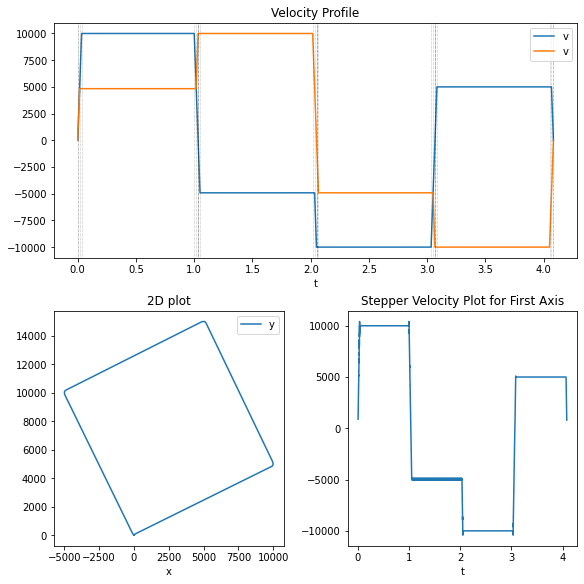

In [2]:
%%time
from trajectory.plot import seg_step 

j = Joint(10_000, 300_000)
joints = [j]*2

sl = SegmentList(joints)  

x = 10000

sl.move([x,x/2])
sl.move([-x/2,x])
sl.move([-x,-x/2])
sl.move([x/2,-x])

df = seg_step(sl)

stepper_plot(sl)
print(sl.step_positions, sl.move_positions)

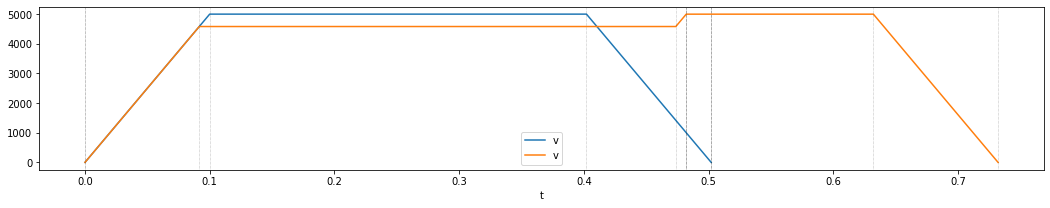

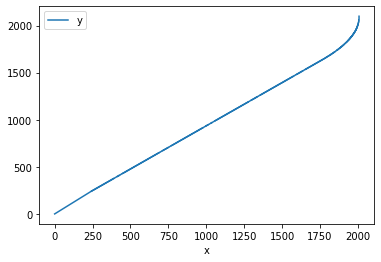

In [4]:


j = Joint(5_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)  
x = 2000
sl.move([x,x])
sl.move([10,1000])

sl.plot()
step_plot(sl)  

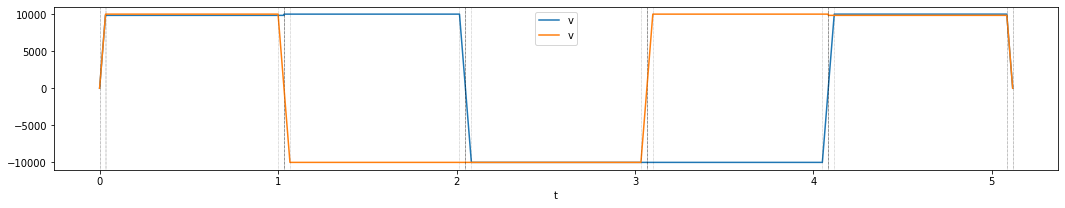

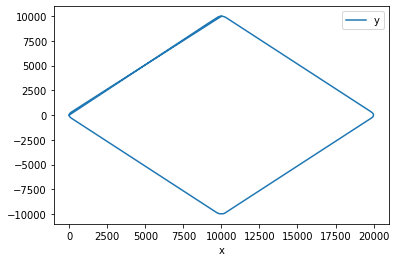

In [5]:
%reload_ext autoreload
%autoreload 2
%run startup.py
from tqdm.auto import tqdm

from trajectory.planner import Segment, SegmentList, Joint

j = Joint(10_000, 300_000)
joints = [j]*2

sl = SegmentList(joints)  
x = 10000

sl.move([x,x])
sl.move([x,-x])
sl.move([-x,-x])
sl.move([-x,x])
sl.move([x,x])
 
sl.plot()
step_plot(sl) 

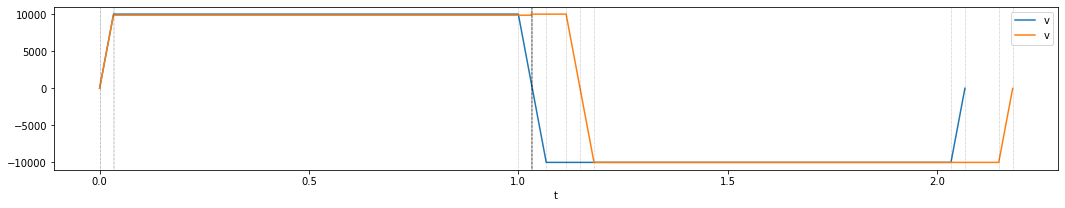

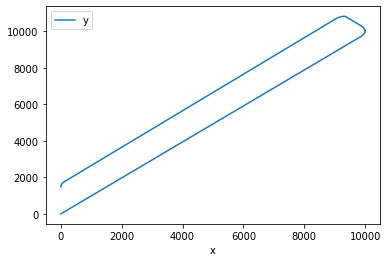

In [6]:
%run startup.py
from tqdm.auto import tqdm

from trajectory.planner import Segment, SegmentList, Joint

j = Joint(10_000, 300_000)
joints = [j]*2

sl = SegmentList(joints)  
x = 10000

sl.move([x,x])
sl.move([1,1000])
sl.move([-x,-x])
 
sl.plot()
step_plot(sl) 

## R=2000 N=100 Tmean = 0.04008666336633663

N Discont,0
Replans,"[(6, 96), (4, 3), (0, 1)]"
N Replans,3154
Errors,[]
Reductions,[]


[0, 0] [-8 -2]


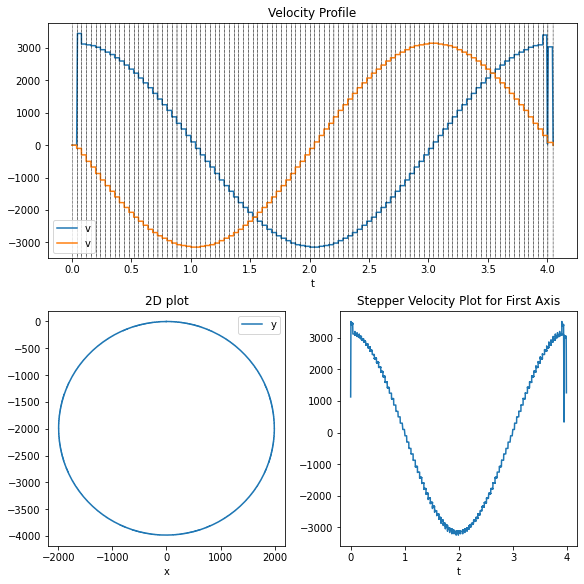

In [93]:
%reload_ext autoreload
%autoreload 2
%run startup.py
from trajectory.plot import  * 
from math import sin, cos, sqrt
from trajectory.planner import Segment, SegmentList, Joint

from trajectory.plot import * 
j = Joint(15_000, 500_000)

def make_circle(j, r=5000, n=100):
   
    joints = [j]*2

    sl = SegmentList(joints)   
    r = r
    lx  = 0
    ly = r
    for i in range(0,n+1):
        a = 2*np.pi*(i/n)
        x = sin(a)*r 
        y = cos(a)*r 

        sl.move((round(x-lx),round(y-ly)))
        lx = x
        ly = y
            
    t_m = np.mean(list(chain(*[s.times for s in sl])))
    display(Markdown(f"## R={r} N={n} Tmean = {t_m}"))     

    
    #sl.plot();plt.show()
    #fig, ax = plt.subplots(1,figsize=(12,12))
    stepper_plot(sl)
    report(sl)
    return sl
 
sl = make_circle(j, 2000, 100)
print(sl.move_positions, sl.step_positions)

<AxesSubplot:xlabel='t'>

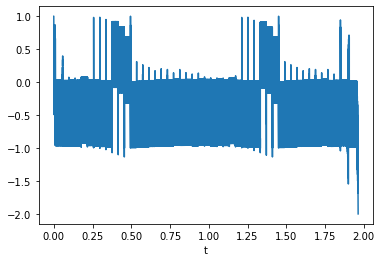

In [91]:
from trajectory.plot import * 
df = seg_step(sl, details=True)
dfv = step_v_df(sl)
df.xe.plot()

<AxesSubplot:xlabel='t'>

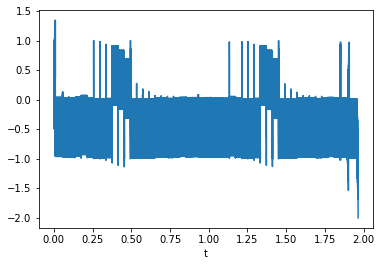

In [89]:
from trajectory.plot import * 
df = seg_step(sl, details=True)
dfv = step_v_df(sl)
df.xe.plot()

In [36]:
tm = 1.011880
t = df.reset_index()
t = t[t.t.between(tm-.00005,tm+.0005)]
t[t.s!=0]

,t,s,dr,pt,tf,v,a,sl,pl,sg,ph,dl,dc,xc,xe
252996,1.011880,-1,-1,0.000120,0.000163,-6161.248768,-295248.0,0,11,27,1,0.000162,0.000005,0.737366,0.262634
253036,1.012040,-1,-1,0.000160,0.039676,-6175.000000,0.0,244,9879,27,2,0.000162,0.000007,0.988000,0.012000
253076,1.012200,-1,-1,0.000320,0.039676,-6175.000000,0.0,243,9839,27,2,0.000162,0.000005,1.976000,0.024000
253117,1.012364,-1,-1,0.000484,0.039676,-6175.000000,0.0,242,9798,27,2,0.000162,0.000007,2.988700,0.011300


In [42]:
tm = 1.011984
t = t[t.t.between(tm-.00005,tm+.00005)]
t

,t,s,dr,pt,tf,v,a,sl,pl,sg,ph,dl,dc,xc,xe
253010,1.011936,0,-1,0.000056,0.039676,-6175.0,0.0,245,9905,27,2,0.000162,0.000065,0.3458,-0.3458
253011,1.011940,0,-1,0.000060,0.039676,-6175.0,0.0,245,9904,27,2,0.000162,0.000069,0.3705,-0.3705
253012,1.011944,0,-1,0.000064,0.039676,-6175.0,0.0,245,9903,27,2,0.000162,0.000073,0.3952,-0.3952
253013,1.011948,0,-1,0.000068,0.039676,-6175.0,0.0,245,9902,27,2,0.000162,0.000077,0.4199,-0.4199
253014,1.011952,0,-1,0.000072,0.039676,-6175.0,0.0,245,9901,27,2,0.000162,0.000081,0.4446,-0.4446
253015,1.011956,0,-1,0.000076,0.039676,-6175.0,0.0,245,9900,27,2,0.000162,0.000085,0.4693,-0.4693
253016,1.011960,0,-1,0.000080,0.039676,-6175.0,0.0,245,9899,27,2,0.000162,0.000089,0.4940,-0.4940
253017,1.011964,0,-1,0.000084,0.039676,-6175.0,0.0,245,9898,27,2,0.000162,0.000093,0.5187,-0.5187
253018,1.011968,0,-1,0.000088,0.039676,-6175.0,0.0,245,9897,27,2,0.000162,0.000097,0.5434,-0.5434
253019,1.011972,0,-1,0.000092,0.039676,-6175.0,0.0,245,9896,27,2,0.000162,0.000101,0.5681,-0.5681


<AxesSubplot:xlabel='v', ylabel='vc'>

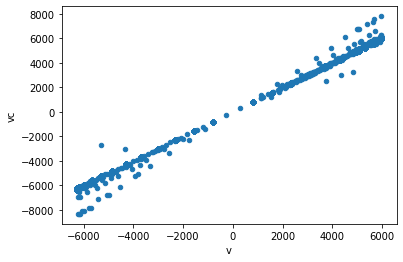

In [57]:
t = df.reset_index()
nz = t[t.s!=0].copy()
nz['vc'] = 1/( nz.t.diff()) * nz.s
nz['v_err'] = (nz.v-nz.vc)
nz.plot.scatter('v','vc')

In [81]:
t = df.reset_index().join(nz[['vc']])
t['vce'] = t.v-t.vc
t.sort_values('vce', ascending=False)

,t,s,dr,pt,tf,v,a,sl,pl,sg,ph,dl,dc,xc,xe,vc,vce
252996,1.011880,-1,-1,0.000120,0.000163,-6161.248768,-295248.0,0,11,27,1,0.000162,0.000005,0.737366,0.262634,-8333.333334,2172.084566
233019,0.931980,-1,-1,0.000116,0.000322,-6192.831872,-391356.0,1,51,25,1,0.000161,0.000005,0.715917,0.284083,-8333.333333,2140.501461
273062,1.092136,-1,-1,0.000128,0.000175,-5697.447502,439939.5,0,12,29,1,0.000176,0.000004,0.732652,0.267348,-7812.500000,2115.052498
243005,0.971920,-1,-1,0.000120,0.000161,-6246.074272,-647192.0,0,10,26,1,0.000160,0.000005,0.745180,0.254820,-8333.333333,2087.259061
263028,1.052004,-1,-1,0.000124,0.000167,-5989.830460,318079.5,0,11,28,1,0.000167,0.000008,0.745027,0.254973,-8064.516129,2074.685669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490661,1.962448,0,1,0.009016,0.009029,8.510030,-490622.5,2,3,50,3,0.117508,0.002310,19.999956,-1.999956,NaN,NaN
490662,1.962452,0,1,0.009020,0.009029,6.547540,-490622.5,2,2,50,3,0.152729,0.002314,19.999979,-1.999979,NaN,NaN
490663,1.962456,0,1,0.009024,0.009029,4.585050,-490622.5,2,1,50,3,0.218100,0.002318,19.999993,-1.999993,NaN,NaN
490664,1.962460,0,1,0.009028,0.009029,2.622560,-490622.5,2,0,50,3,0.381307,0.002322,20.000000,-2.000000,NaN,NaN


In [82]:
idx = 233019
t.iloc[idx-10:idx+10]

,t,s,dr,pt,tf,v,a,sl,pl,sg,ph,dl,dc,xc,xe,vc,vce
233009,0.931940,0,-1,0.000076,0.000322,-6177.177632,-391356.0,2,61,25,1,0.000162,0.000094,0.468454,-0.468454,NaN,NaN
233010,0.931944,0,-1,0.000080,0.000322,-6178.743056,-391356.0,2,60,25,1,0.000162,0.000098,0.493172,-0.493172,NaN,NaN
233011,0.931948,0,-1,0.000084,0.000322,-6180.308480,-391356.0,2,59,25,1,0.000162,0.000106,0.517897,-0.517897,NaN,NaN
233012,0.931952,0,-1,0.000088,0.000322,-6181.873904,-391356.0,2,58,25,1,0.000162,0.000114,0.542627,-0.542627,NaN,NaN
233013,0.931956,0,-1,0.000092,0.000322,-6183.439328,-391356.0,2,57,25,1,0.000162,0.000122,0.567364,-0.567364,NaN,NaN
233014,0.931960,0,-1,0.000096,0.000322,-6185.004752,-391356.0,2,56,25,1,0.000162,0.000130,0.592107,-0.592107,NaN,NaN
233015,0.931964,0,-1,0.000100,0.000322,-6186.570176,-391356.0,2,55,25,1,0.000162,0.000138,0.616857,-0.616857,NaN,NaN
233016,0.931968,0,-1,0.000104,0.000322,-6188.135600,-391356.0,2,54,25,1,0.000162,0.000146,0.641612,-0.641612,NaN,NaN
233017,0.931972,0,-1,0.000108,0.000322,-6189.701024,-391356.0,2,53,25,1,0.000162,0.000154,0.666374,-0.666374,NaN,NaN
233018,0.931976,0,-1,0.000112,0.000322,-6191.266448,-391356.0,2,52,25,1,0.000162,0.000162,0.691143,-0.691143,NaN,NaN


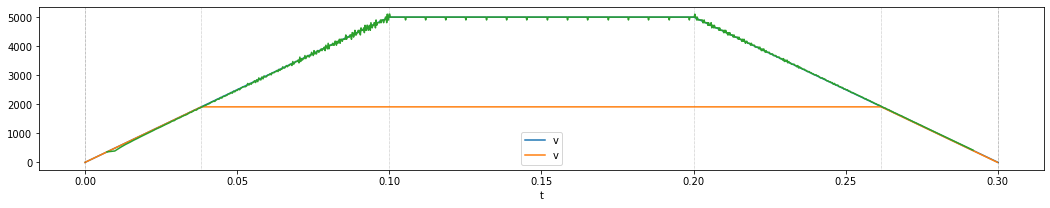

In [8]:
#
# Calculate velocity profile directly from steps
#
j = Joint(5_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)  

x = 1000

sl.move([x,x/2])
#sl.move([x/2,x])

ax = sl.plot()



step_v_plot(sl)